##### Install Libraries

In [1]:
!pip install onnx
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.9 MB/s eta 0:00:00


##### Load the model and Inference

In [2]:
import numpy as np
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

In [3]:
processor

BlipProcessor:
- image_processor: BlipImageProcessor {
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_pad": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "BlipImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "processor_class": "BlipProcessor",
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 384,
    "width": 384
  },
  "size_divisor": 32
}

- tokenizer: BertTokenizerFast(name_or_path='Salesforce/blip-image-captioning-large', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=Tr

In [4]:
model

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-23): 24 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (projection): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1024, out_features=4096, bias=True)
            (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          )
          (layer_norm2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((1024,),

In [5]:
processor

BlipProcessor:
- image_processor: BlipImageProcessor {
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_pad": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "BlipImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "processor_class": "BlipProcessor",
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 384,
    "width": 384
  },
  "size_divisor": 32
}

- tokenizer: BertTokenizerFast(name_or_path='Salesforce/blip-image-captioning-large', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=Tr

In [6]:

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# conditional image captioning
text = None
inputs = processor(raw_image, text, return_tensors="pt")#.to("cuda")
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


woman sitting on the beach with her dog and a cell phone


#### Convert Model to onnx

*Convert Vision model*

In [7]:
VISION_MODEL_ONNX = 'vision_model.onnx'
vision_model = model.vision_model
vision_model.eval()

BlipVisionModel(
  (embeddings): BlipVisionEmbeddings(
    (patch_embedding): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
  )
  (encoder): BlipEncoder(
    (layers): ModuleList(
      (0-23): 24 x BlipEncoderLayer(
        (self_attn): BlipAttention(
          (dropout): Dropout(p=0.0, inplace=False)
          (qkv): Linear(in_features=1024, out_features=3072, bias=True)
          (projection): Linear(in_features=1024, out_features=1024, bias=True)
        )
        (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (mlp): BlipMLP(
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
        )
        (layer_norm2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      )
    )
  )
  (post_layernorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
)

In [8]:
import torch
with torch.no_grad():
    vision_outputs = vision_model(inputs["pixel_values"])

In [9]:
image_embeds = vision_outputs[0]

In [10]:
with torch.no_grad():
  torch.onnx.export(vision_model, inputs["pixel_values"], VISION_MODEL_ONNX, input_names=["pixel_values"])


*Convert text decoder Model*

In [11]:
TEXT_DECODER_ONNX = 'text_decoder_model.onnx'
text_decoder_model = model.text_decoder
text_decoder_model.eval()

BlipTextLMHeadModel(
  (bert): BlipTextModel(
    (embeddings): BlipTextEmbeddings(
      (word_embeddings): Embedding(30524, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): BlipTextEncoder(
      (layer): ModuleList(
        (0-11): 12 x BlipTextLayer(
          (attention): BlipTextAttention(
            (self): BlipTextSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): BlipTextSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
     

In [12]:
input_ids = torch.from_numpy(np.array([[0]]))
input_id_attention =  torch.ones(input_ids.size(), dtype=torch.long)

In [13]:
image_attention_mask = torch.ones(image_embeds.size()[:-1], dtype=torch.long)
input_dict = {"input_ids": input_ids, "attention_mask": input_id_attention, "encoder_hidden_states": image_embeds, "encoder_attention_mask": image_attention_mask}
# specify variable length axes
dynamic_axes = {"input_ids": {1: "seq_len"}, "attention_mask": {1: "seq_len"}}
# export PyTorch model to ONNX
with torch.no_grad():
    torch.onnx.export(text_decoder_model, input_dict, TEXT_DECODER_ONNX, input_names=list(input_dict), dynamic_axes=dynamic_axes)

/usr/local/lib/python3.10/dist-packages/transformers/models/blip/modeling_blip_text.py:707: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if is_decoder:
/usr/local/lib/python3.10/dist-packages/transformers/models/blip/modeling_blip_text.py:626: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if is_decoder:
/usr/local/lib/python3.10/dist-packages/transformers/models/blip/modeling_blip_text.py:635: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will

#### Run Inference with onnx

In [14]:
import onnxruntime
vision_model_sess = onnxruntime.InferenceSession('vision_model.onnx')
text_model_sess = onnxruntime.InferenceSession('text_decoder_model.onnx')


In [40]:
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

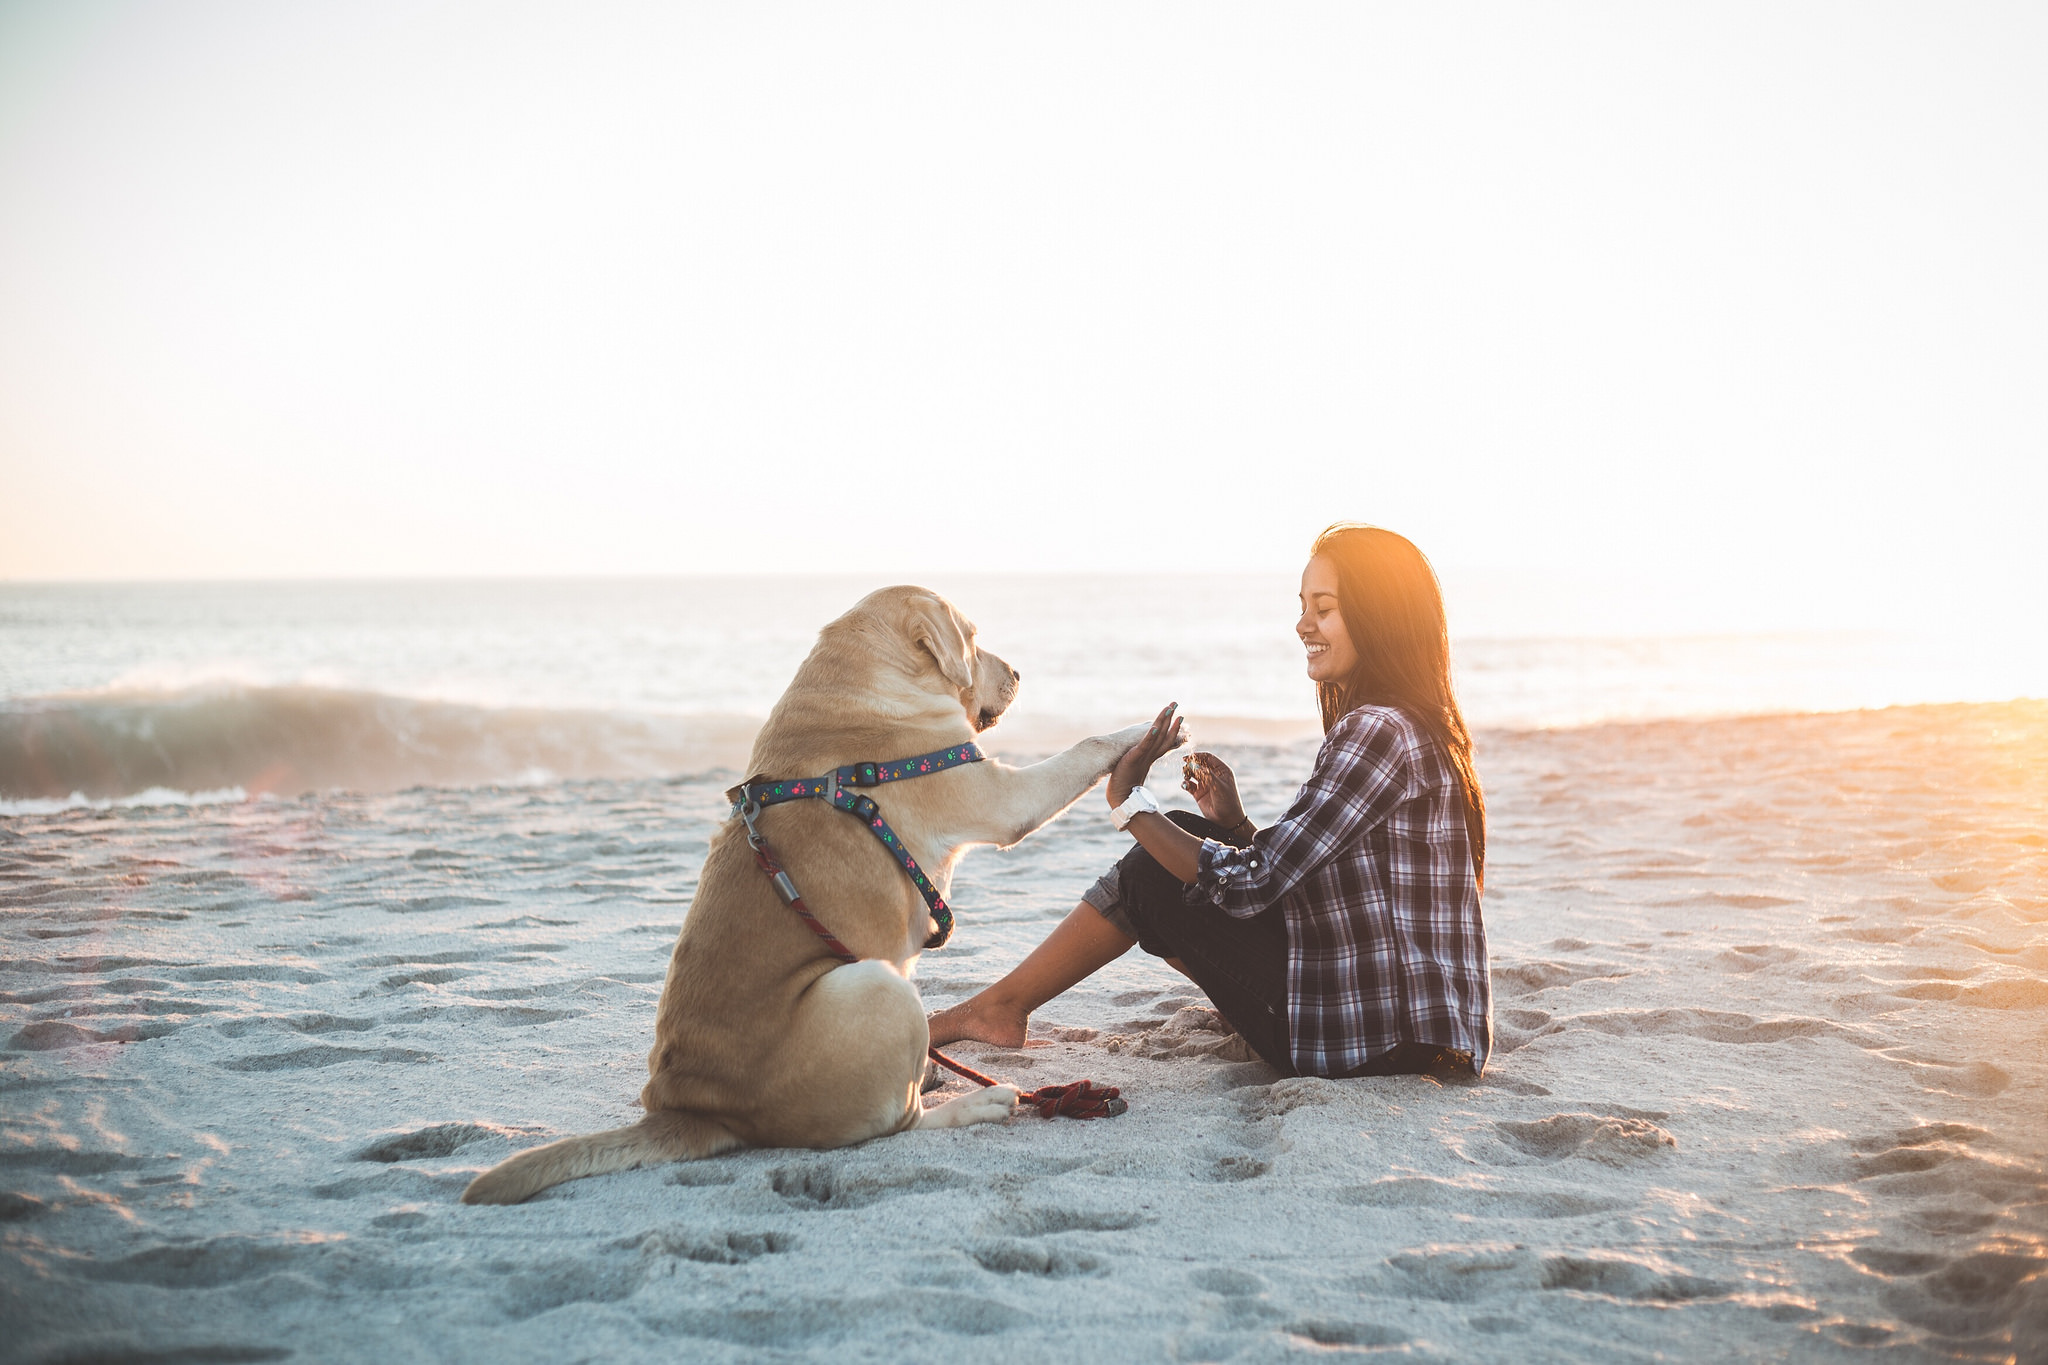

In [41]:
raw_image

In [42]:
new_size = (384, 384)
raw_image = raw_image.resize(new_size)

In [43]:
 norm_d =  {

  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],

  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ]

}

In [44]:
image_array = np.array(raw_image) / 255.0
mean = norm_d["image_mean"]
std = norm_d["image_std"]
normalized_image = (image_array - mean) / std
original_image = Image.fromarray((normalized_image * 255).astype(np.uint8))

In [45]:
normalized_image = np.transpose(normalized_image, (2, 0, 1)).reshape(1, 3, 384, 384)
print(normalized_image.shape)

(1, 3, 384, 384)


In [46]:
input_data = normalized_image.astype(np.float32)  # Your input data
input_name = vision_model_sess.get_inputs()[0].name
inputs_val = {input_name: input_data}

output_name = vision_model_sess.get_outputs()[0].name
result = vision_model_sess.run([output_name], inputs_val)
output_data = result[0]

Text Encoder

In [48]:
image_embeds =torch.from_numpy(output_data.astype(np.float32))
image_attention_mask = torch.ones(image_embeds.size()[:-1], dtype=torch.long)

In [50]:
input_ids = np.array([[0]])
input_id_attention =  np.ones(input_ids.shape).astype(np.int64)

In [51]:
for i in range(20):
  inputs_val = {text_model_sess.get_inputs()[0].name:input_ids, text_model_sess.get_inputs()[1].name: input_id_attention , text_model_sess.get_inputs()[2].name: np.array(image_embeds), text_model_sess.get_inputs()[3].name:np.array(image_attention_mask)}
  result = text_model_sess.run(None, inputs_val)
  output_logits = result[0]

  # Example: Convert logits to probabilities or decode output
  probabilities = np.exp(output_logits) / np.sum(np.exp(output_logits), axis=-1, keepdims=True)
  pred_class = np.argmax(probabilities, axis=-1)
  input_ids = np.append(input_ids, [[pred_class[0][-1]]], axis=-1)
  input_id_attention =  np.ones(input_ids.shape).astype(np.int64)






In [52]:
print(processor.decode(input_ids[0], skip_special_tokens=True))

woman sitting on the beach with her dog and a cell phone
